In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data_tumor = "BRCA_Primary_Tumor.chr19.tsv"
data_normal = "BRCA_Solid_Tissue_Normal.chr19.tsv"

In [43]:
# read data
tumor = pd.read_csv(data_tumor, delimiter="\t")
tumor = tumor.reset_index().rename(columns={"index":"location"})
tumor

,location,Unnamed: 0,6005486021_R01C01,6005486021_R02C01,6005486021_R03C01,6005486021_R04C01,6005486021_R05C01,6005486021_R06C01,6005486021_R01C02,6005486021_R02C02,...,6285633072_R02C02,6285633072_R04C02,6285633072_R03C02,6285633072_R05C02,7786923102_R06C02,7796806109_R01C01,7796806109_R05C01,7796806109_R06C01,7796806109_R04C01,7796806109_R02C01
0,0,cg15886596,10,10,7,7,7,7,8,6,...,13,14,11,12,13,13,12,11,12,12
1,1,cg12261117,61,44,40,30,39,30,37,38,...,45,50,41,41,74,71,72,52,63,48
2,2,cg18110419,442,617,652,689,658,636,607,514,...,665,565,608,596,701,488,625,639,701,508
3,3,cg25433760,521,976,960,979,950,971,977,969,...,965,964,953,958,962,973,976,978,973,974
4,4,cg23278040,162,486,760,224,818,561,549,715,...,462,207,54,270,366,384,788,434,592,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,24666,cg23652859,66,702,683,724,654,677,580,648,...,396,848,370,444,491,424,324,594,446,288
24667,24667,cg03567148,962,990,974,969,991,978,981,979,...,946,934,926,950,973,911,928,957,955,952
24668,24668,cg13678479,959,964,972,972,970,966,959,969,...,967,954,920,968,948,941,939,955,943,950
24669,24669,cg05617300,990,988,990,987,988,988,989,988,...,982,986,985,984,980,985,984,987,983,980


In [44]:
tumor_patients = tumor.columns[2:]

In [45]:
normal = pd.read_csv(data_normal, delimiter="\t")
normal = normal.reset_index().rename(columns={"index":"location"})
normal

,location,Unnamed: 0,6005486025_R04C01,6005486025_R02C01,6005486025_R03C01,6005486025_R01C01,6005486025_R06C01,6005486011_R03C01,6005486011_R04C01,6005486011_R01C02,...,6042324006_R05C02,6057833134_R03C02,6057833134_R04C02,6057833159_R05C02,6057833166_R01C01,6057833166_R03C01,6285633051_R02C01,6057833155_R06C02,6057833101_R02C01,6057833101_R06C02
0,0,cg15886596,10,8,9,9,9,7,7,8,...,8,10,12,11,12,11,9,11,10,10
1,1,cg12261117,56,38,39,59,48,37,43,46,...,72,57,67,62,67,61,40,80,65,61
2,2,cg18110419,731,665,662,698,672,734,702,661,...,928,653,710,686,640,627,767,733,684,668
3,3,cg25433760,949,958,951,964,958,971,965,970,...,899,943,959,958,932,954,974,940,941,971
4,4,cg23278040,309,267,778,625,452,600,636,598,...,449,286,512,562,558,367,692,295,288,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,24666,cg23652859,91,58,190,303,74,221,283,472,...,127,100,234,195,168,315,255,104,241,377
24667,24667,cg03567148,915,862,938,971,898,968,970,947,...,752,814,892,868,908,892,951,805,827,956
24668,24668,cg13678479,973,948,966,964,978,969,993,973,...,938,946,952,957,947,954,971,948,960,953
24669,24669,cg05617300,984,988,984,986,988,991,991,990,...,978,976,978,984,979,976,987,980,980,981


In [46]:
normal_patients = normal.columns[2:]

# plot moving average

In [7]:
def min_max_norm(x):
    return (x-x.min())/(x.max()-x.min())

def add_moving_avg_features(df, features, sample_size, window_length):
    sampled_patients = pd.Series(features).sample(sample_size)
    df["std"] = df.loc[:,sampled_patients].std(axis=1)
    df["mean"] = df.loc[:,sampled_patients].mean(axis=1)
    #df["SMA_std"] = df["std"].rolling(window_length).std()
    df["SMA_mean"] = df["mean"].rolling(window_length).mean()
    #df["SMA_std_norm"] = min_max_norm(df["SMA_std"])
    #df["SMA_median_norm"] = min_max_norm(df["SMA_median"])
    return df


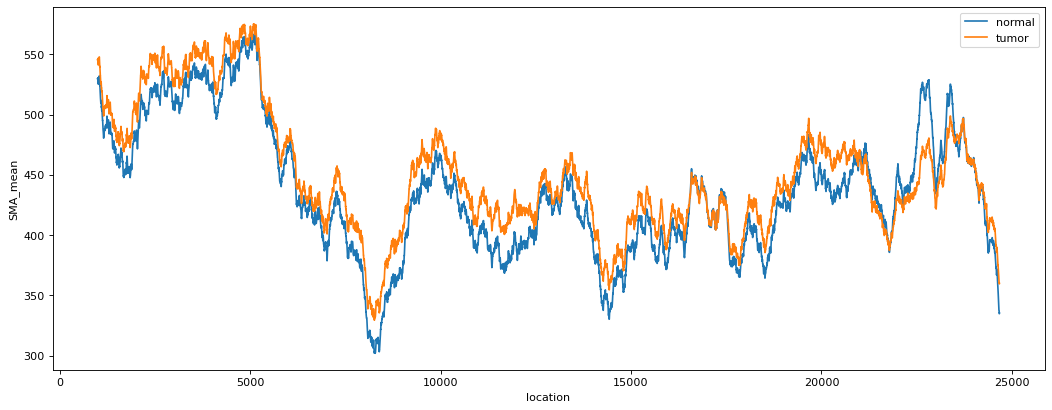

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)

normal = add_moving_avg_features(normal, normal_patients, 90, 1000)
tumor = add_moving_avg_features(tumor, tumor_patients, 90, 1000)


sns.lineplot(data=normal, x="location", y="SMA_mean", label="normal")
sns.lineplot(data=tumor, x="location", y="SMA_mean", label="tumor")

# simulate 10,000 iterations

In [9]:
WINDOW_LENGTH = 50
normal_new = add_moving_avg_features(normal, normal_patients, 3, WINDOW_LENGTH)
tumor_new = add_moving_avg_features(tumor, tumor_patients, 3, WINDOW_LENGTH)
difference = (normal["SMA_mean"] - tumor["SMA_mean"])**2

n = 1000
for i in tqdm(range(n)):
    normal_new = add_moving_avg_features(normal, normal_patients, 5, WINDOW_LENGTH)
    tumor_new = add_moving_avg_features(tumor, tumor_patients, 5, WINDOW_LENGTH)
    new_difference = (normal_new["SMA_mean"] - tumor_new["SMA_mean"])**2
    difference = difference + new_difference
difference

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 141.94it/s]


0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
             ...      
24666    565783.637776
24667    599864.040832
24668    596368.962160
24669    594441.789122
24670    592155.546364
Name: SMA_mean, Length: 24671, dtype: float64

In [10]:
squre_diff = difference.to_frame("avg_difference").reset_index().drop(columns="index").reset_index()
squre_diff["avg_difference"] = squre_diff["avg_difference"]/(n+1)
#sns.lineplot(data=normal, x="location", y="SMA_median_norm")

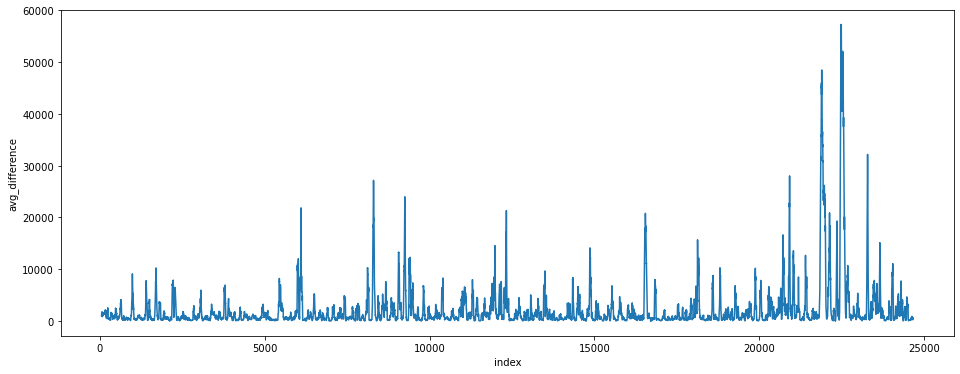

In [11]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=squre_diff, x="index", y="avg_difference")

In [49]:
normal_T = normal[normal_patients].T
normal_T["label"] = 0
tumor_T = tumor[tumor_patients].T.sample(97)
tumor_T["label"] = 1
concated = pd.concat([normal_T, tumor_T])

In [51]:
concated["label"]

6005486025_R04C01    0
6005486025_R02C01    0
6005486025_R03C01    0
6005486025_R01C01    0
6005486025_R06C01    0
                    ..
6004791004_R04C01    1
6026818135_R01C01    1
9630789239_R02C01    1
6026818108_R01C02    1
6026818128_R03C01    1
Name: label, Length: 194, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y = concated["label"]
X = concated.drop(columns=["label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42,
                                              stratify=y)

# XGboost for all features

In [15]:
xg_all = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=1, objective='binary:logistic')
xg_all.fit(X_train, y_train)
y_pred = xg_all.predict(X_test)

In [16]:
print(f"The accuracy is:{accuracy_score(y_pred, y_test)}, recall:{recall_score(y_pred, y_test)}, precision:{precision_score(y_pred, y_test)}, f1:{f1_score(y_pred, y_test)}")

The accuracy is:0.9591836734693877, recall:1.0, precision:0.9166666666666666, f1:0.9565217391304348


# XGBoost for single feature

In [52]:
X_test.shape[1]

24671

In [88]:
sites = X_test.shape[1]
accuracy_lst, recall_lst, precision_lst, f1_lst = [], [], [], []
splitters = []
splitters_values = []
for site in tqdm(range(sites)):
    xg_simple = XGBClassifier(n_estimators=1, max_depth=1, learning_rate=1, objective='binary:logistic')
    xg_simple.fit(X_train[[site]], y_train)
    y_pred = xg_simple.predict(X_test[[site]])
    accuracy, recall, precision, f1 = accuracy_score(y_pred, y_test), recall_score(y_pred, y_test), precision_score(y_pred, y_test), f1_score(y_pred, y_test)
    accuracy_lst.append(accuracy)
    recall_lst.append(recall)
    precision_lst.append(precision)
    f1_lst.append(f1)
    if accuracy > 0.89:
        splitters.append(site)
        splitter_value = xg_simple.get_booster().get_split_value_histogram(site)["SplitValue"][0]
        splitters_values.append(splitter_value)

  0%|                                                                               | 20/24671 [00:00<06:42, 61.25it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

  1%|▍                                                                             | 153/24671 [00:02<06:17, 64.89it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

  2%|█▋                                                                            | 543/24671 [00:08<06:52, 58.52it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to 

 20%|██████████████▌                                                           | 4850/24671 [10:02:06<09:55, 33.31it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 20%|██████████████▊                                                           | 4950/24671 [10:02:09<10:58, 29.96it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 20%|███████████████                                                           | 5012/24671 [10:02:11<08:33, 38.32it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to 

 36%|██████████████████████████▋                                               | 8881/24671 [10:04:39<11:27, 22.95it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 36%|██████████████████████████▊                                               | 8932/24671 [10:04:41<11:15, 23.30it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 39%|████████████████████████████▋                                             | 9556/24671 [10:05:08<11:12, 22.47it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to 

 55%|████████████████████████████████████████▎                                | 13635/24671 [10:08:00<06:57, 26.44it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 55%|████████████████████████████████████████▍                                | 13674/24671 [10:08:01<08:09, 22.48it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 56%|█████████████████████████████████████████▏                               | 13921/24671 [10:08:12<08:03, 22.22it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to 

 76%|███████████████████████████████████████████████████████▏                 | 18643/24671 [10:11:35<04:34, 21.98it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 76%|███████████████████████████████████████████████████████▍                 | 18734/24671 [10:11:39<04:29, 22.02it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 76%|███████████████████████████████████████████████████████▊                 | 18860/24671 [10:11:45<03:51, 25.07it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to 

 93%|███████████████████████████████████████████████████████████████████▉     | 22965/24671 [10:14:41<01:16, 22.21it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 94%|████████████████████████████████████████████████████████████████████▍    | 23139/24671 [10:14:49<01:09, 22.05it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

 95%|█████████████████████████████████████████████████████████████████████▏   | 23403/24671 [10:15:00<00:56, 22.38it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to 

In [89]:
len(splitters)

322

In [78]:
acc_df = pd.DataFrame({"accuracy":accuracy_lst}).reset_index()
f1_df = pd.DataFrame({"f1":f1_lst}).reset_index()

In [79]:
normal_means = normal[normal_patients].mean(axis=1)[splitters]
tumor_means = tumor[tumor_patients].mean(axis=1)[splitters]
spliters_df = pd.DataFrame({"location":splitters,
                             "split_value":splitters_values,
                              "normal_means":normal_means,
                              "tumor_means":tumor_means,
                               "accuracy": pd.Series(accuracy_lst).loc[splitters]})

# Accuracy heatmap of single discriminator

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 9 Text major ticklabel objects>)

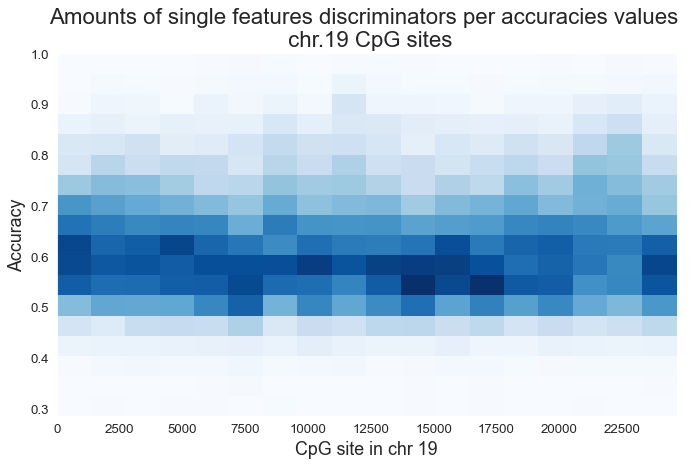

In [80]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.hist2d(acc_df["index"], acc_df["accuracy"], cmap="Blues", bins=18)
plt.title("Amounts of single features discriminators per accuracies values \n chr.19 CpG sites", size=20)
plt.ylabel("Accuracy", fontsize=16)
plt.xlabel("CpG site in chr 19", fontsize=16)
plt.xticks(range(0,24000,2500), fontsize=12)
plt.yticks(fontsize=12)

# plot areas on average distance differences

In [81]:
spliters_df["squre_diff_value"] = squre_diff.loc[spliters_df.index]["avg_difference"]

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 <a list of 9 Text major ticklabel objects>)

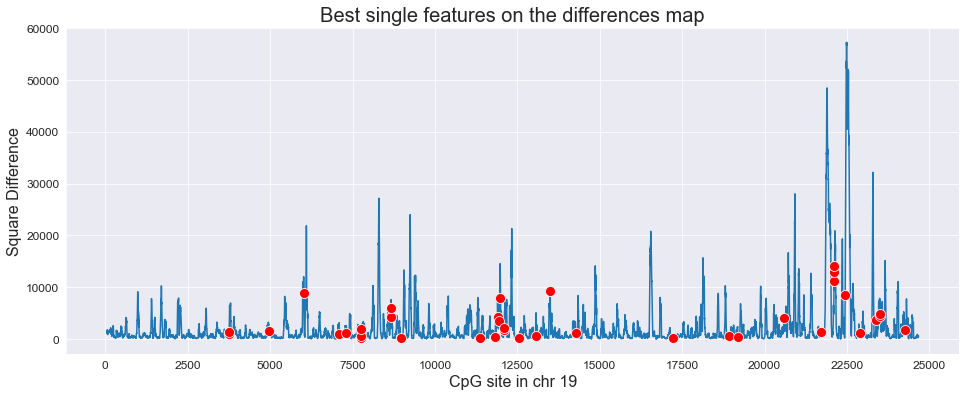

In [82]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(data=spliters_df[spliters_df["accuracy"] > 0.95], x="location", y="squre_diff_value", ax=ax, color="red", s=100, zorder=2)
sns.lineplot(data=squre_diff, x="index", y="avg_difference", ax=ax, zorder=1)
plt.title("Best single features on the differences map", size=20)
plt.ylabel("Square Difference", fontsize=16)
plt.xlabel("CpG site in chr 19", fontsize=16)
plt.xticks(range(0,26000,2500), fontsize=12)
plt.yticks(fontsize=12)

# plot of normal and tumor means

In [83]:
import plotly.express as px
px.scatter(spliters_df,
           x='normal_means',
           y='tumor_means',
          title="Best single features normal means vs tumor means",
           labels={"normal_means":"Normal means","tumor_means":"Tumor means"}
          )

In [84]:
from sklearn.mixture  import GaussianMixture
gaussian_cluster = GaussianMixture(n_components=2, random_state=0).fit(spliters_df[["normal_means", "tumor_means"]])
px.scatter(spliters_df, x='normal_means', y='tumor_means', 
           color=gaussian_cluster.predict(spliters_df[["normal_means", "tumor_means"]]),
          color_continuous_scale='Bluered_r',
          title="Gaussian Mixture clustering of features by tumor means and normal means",
          labels={"normal_means":"Normal means","tumor_means":"Tumor means"})

In [ ]:
spliters_df.sort_values(by="accuracy")

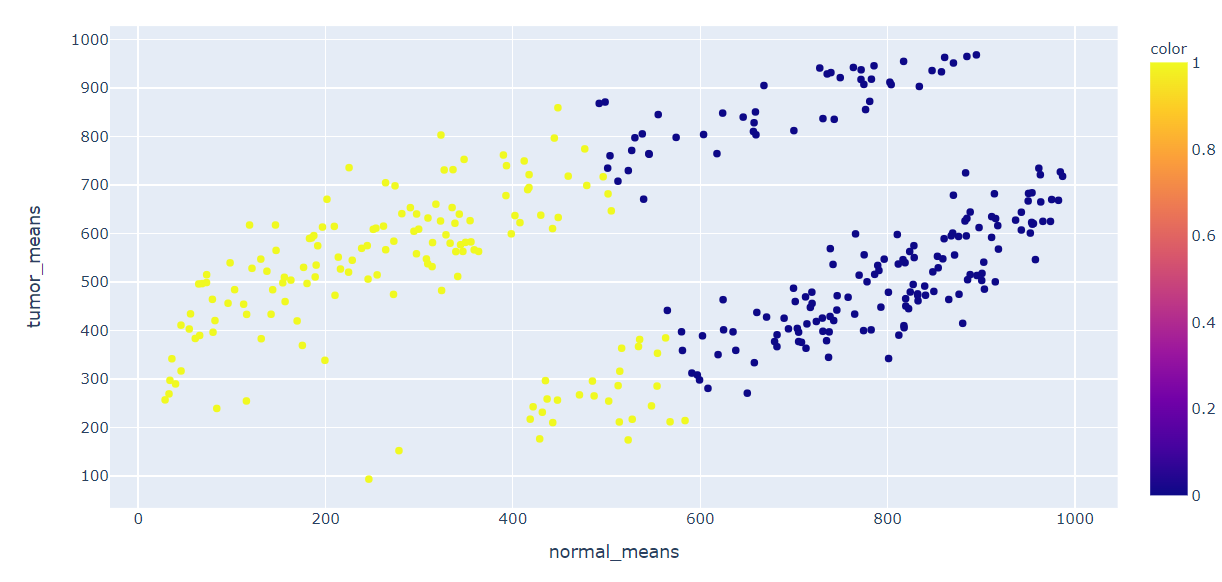

# Save Data

In [ ]:
label_cluster = pd.DataFrame(spectral.predict(spliters_df[["normal_means", "tumor_means"]]), columns=["label"])
label_cluster.index = spliters_df.index
pd.concat([spliters_df, label_cluster],axis=1).sort_values(by="label").to_csv("two_cluster.csv")